In [328]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

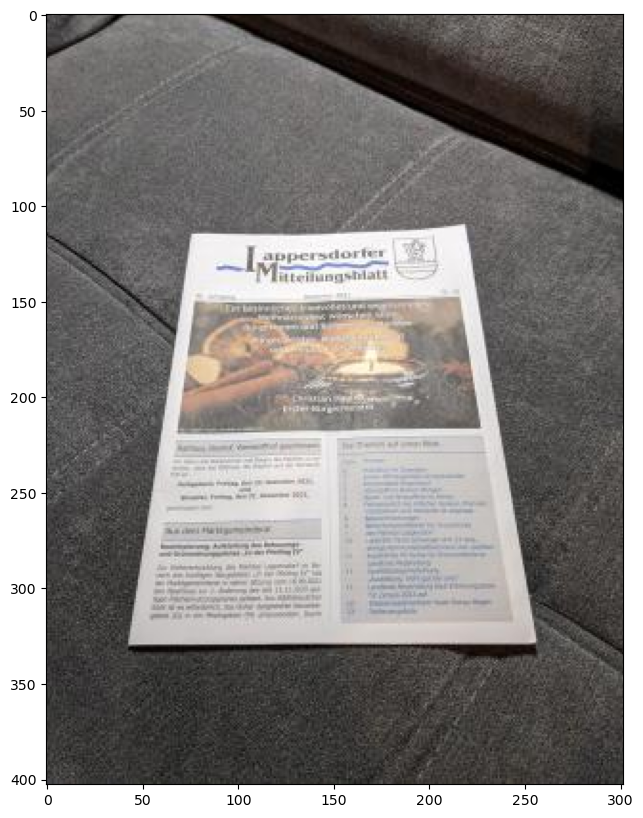

In [330]:
img = cv2.imread('data/document.jpg')
img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f9ba3efb2d0>)

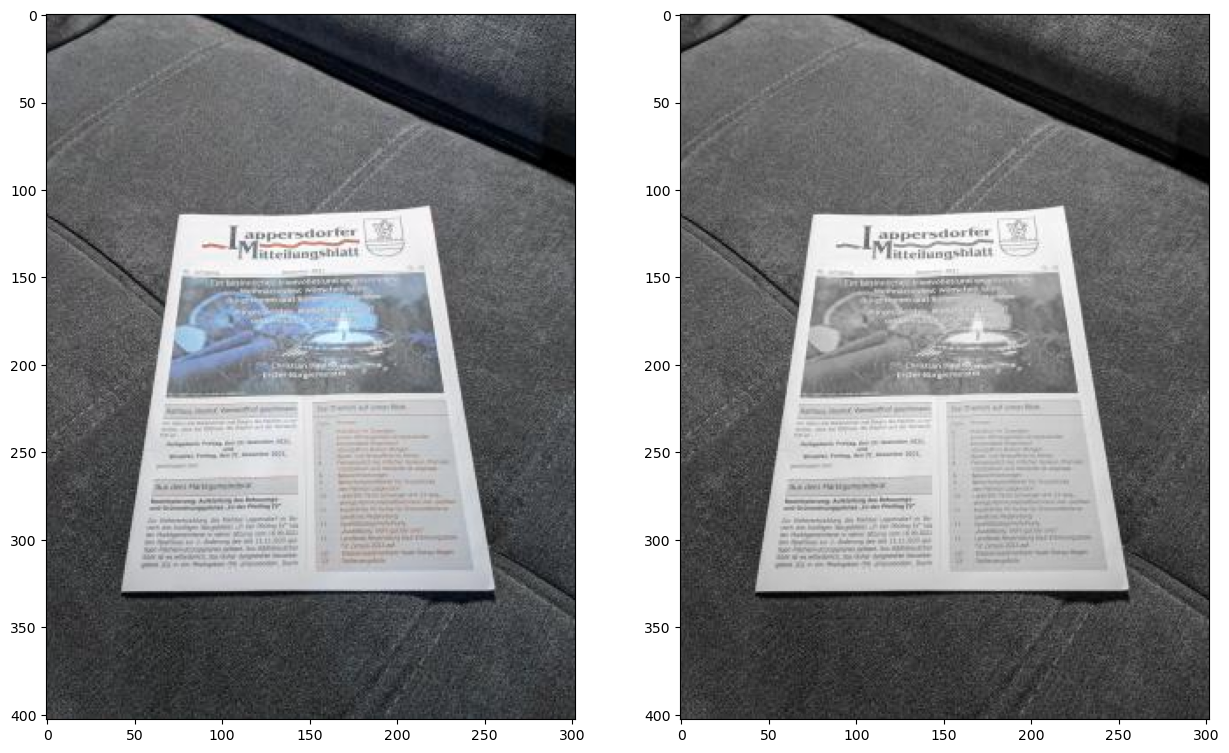

In [331]:
img = cv2.imread('data/document.jpg')
gray = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')


(<Axes: >, <matplotlib.image.AxesImage at 0x7f9ba3ae5050>)

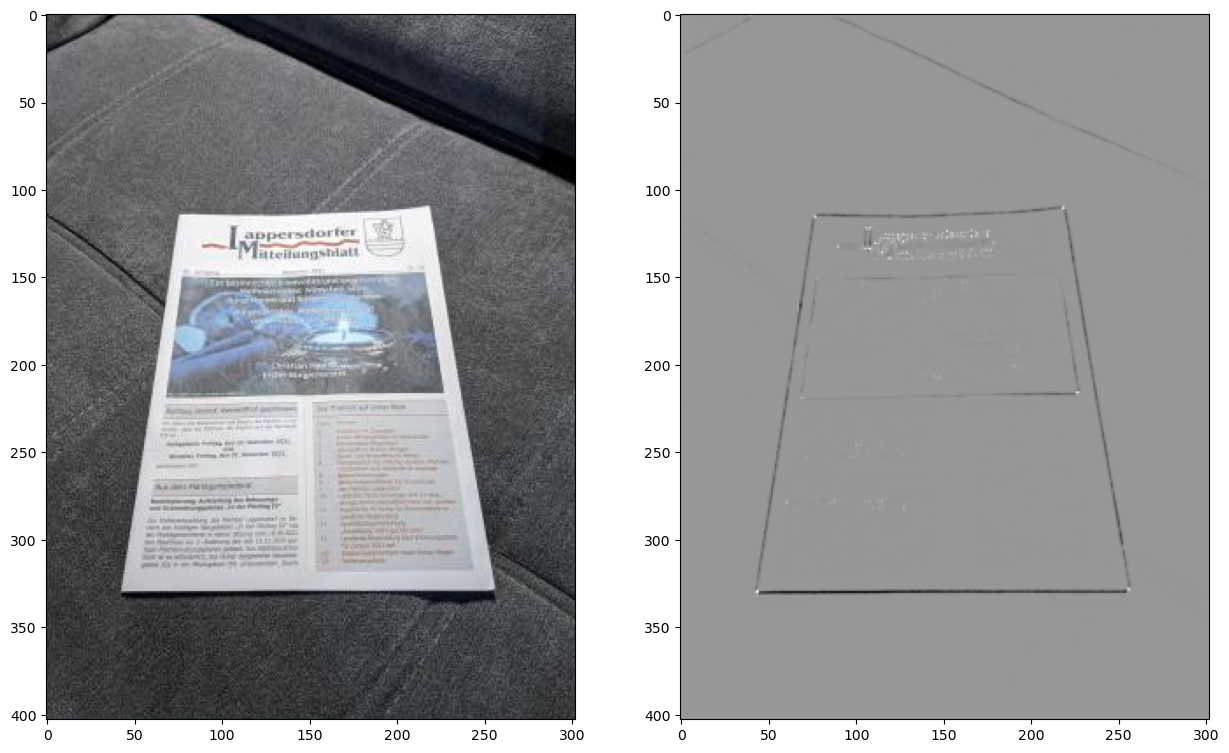

In [332]:
cornerness = cv2.cornerHarris(gray,2,3,0.04)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(cornerness, cmap='gray')

In [333]:
cornerness[cornerness<0] = 0
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(cornerness, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x7f9ba31652d0>)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f9ba300b2d0>)

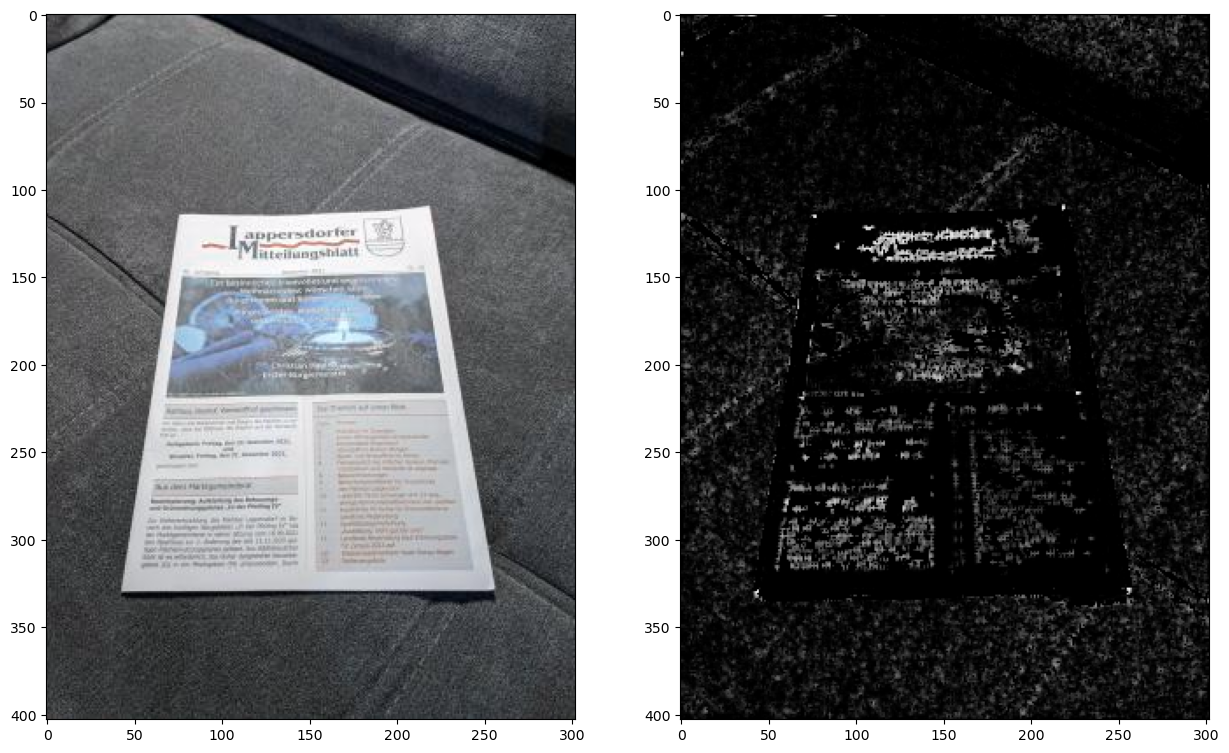

In [335]:
cornerness = np.log(cornerness + 1e-6)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(cornerness, cmap='gray')

(76, 115)
(219, 111)
(43, 330)
(256, 329)


(<Axes: >, <matplotlib.image.AxesImage at 0x7f9ba2f08bd0>)

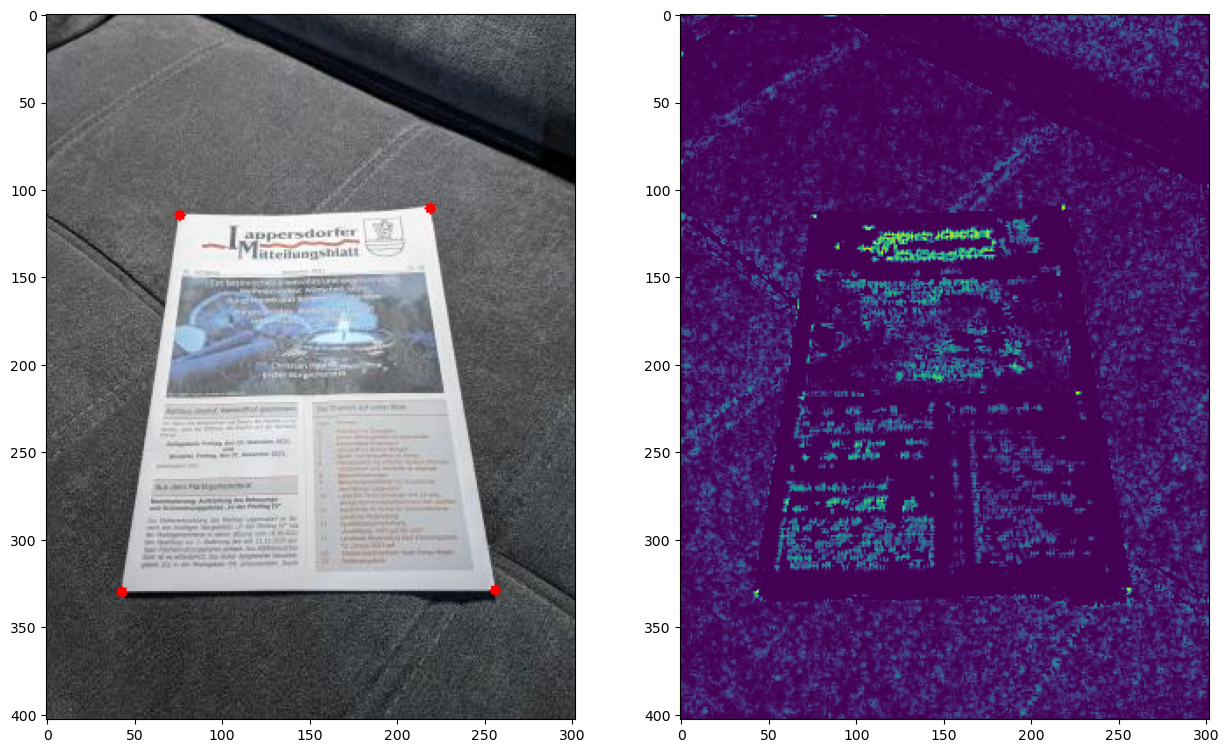

In [337]:
# Detection thresholds
th_top_left, th_top_right = -1e6, -1e6
th_bottom_left, th_bottom_right = -1e6, -1e6
# Corner coordinates
opt_top_left, opt_top_right = None, None
opt_bottom_left, opt_bottom_ritgh = None, None
quad_size = 7

for r in range(quad_size, rows-quad_size):
    for c in range(quad_size, cols-quad_size):
        if cornerness[r, c] < -7:
            continue
        block = 255*gray[r-quad_size:r+quad_size+1, c-quad_size:c+quad_size+1]
        quad_top_left = block[0:quad_size, 0:quad_size]
        quad_top_right = block[0:quad_size, quad_size+1:quad_size*2+1]
        quad_bottom_left = block[quad_size+1:quad_size*2+1, 0:quad_size]
        quad_bottom_right =  block[quad_size+1:quad_size*2+1, quad_size+1:quad_size*2+1]        
        descriptor = np.mean(quad_bottom_right) - np.mean(quad_top_left) - np.mean(quad_top_right) - np.mean(quad_bottom_left)
        if descriptor > th_top_left:
             th_top_left = descriptor
             opt_top_left = (c, r)
            
        descriptor = np.mean(quad_bottom_left) - np.mean(quad_top_left) - np.mean(quad_top_right) - np.mean(quad_bottom_right)   
        if descriptor > th_top_right:
            th_top_right = descriptor
            opt_top_right = (c, r)
            
        descriptor = np.mean(quad_top_right)  - np.mean(quad_top_left) - np.mean(quad_bottom_right) - np.mean(quad_bottom_left)    
        if descriptor > th_bottom_left:
            th_bottom_left = descriptor
            opt_bottom_left = (c, r)    

        descriptor = np.mean(quad_top_left) - np.mean(quad_top_right) - np.mean(quad_bottom_right) - np.mean(quad_bottom_left)    
        if descriptor > th_bottom_right:
            th_bottom_right = descriptor
            opt_bottom_right = (c, r)
            
print(opt_top_left)
print(opt_top_right)
print(opt_bottom_left)  
print(opt_bottom_right)

out = cv2.circle(img, opt_top_left, 3, (255,0,0), -1)
out = cv2.circle(img, opt_top_right, 3, (255,0,0), -1)
out = cv2.circle(img, opt_bottom_left, 3, (255,0,0), -1)
out = cv2.circle(img, opt_bottom_right, 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(out)
plt.subplot(122), plt.imshow(cornerness)

In [340]:
# Does it matter whether the picture has been taken by a 1Mpx camera or a 12Mpx camera? How?
# Думаю это только бы заняло больше маширрого времени, не упростив задачу и не улучшив результат
# If we increased the resolution of the camera, what would you change in the current algorithm?
# Я бы сначала применил сжатие